In [1]:
# Must have pandas, pymongo, and yfinace installed on environment
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
#API calls
#AstraZeneca
azn = yf.Ticker("GME")
#Bristol Myers Squibb
bmy = yf.Ticker("BMY")
#Johnson & Johnson
jnj = yf.Ticker("JNJ")
#Merck
mrk = yf.Ticker("MRK")
#Pfizer
pfe = yf.Ticker("PFE")

In [3]:
mrk

yfinance.Ticker object <MRK>

In [4]:
#Extracting history data from stocks (parameters can change)
#Period parameters - 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
#Interval parameters - 1m, 2m, 5m, 15m, 30m, 1h, 1d, 5d, 1wk, 1mo, 3mo
azn_data = azn.history(interval="1d", period="10y")
bmy_data = bmy.history(interval="1d", period="10y")
jnj_data = jnj.history(interval="1d", period="10y")
mrk_data = mrk.history(interval="1d", period="10y")
pfe_data = pfe.history(interval="1d", period="10y")

In [5]:
azn_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-03-07,13.546800,13.654528,13.257281,13.270746,3568600,0.0,0
2011-03-08,13.264012,13.486201,13.102419,13.344808,2365100,0.0,0
2011-03-09,13.344805,13.391936,13.264009,13.304407,3784300,0.0,0
2011-03-10,13.243812,13.317876,13.129351,13.183215,5013600,0.0,0
2011-03-11,13.095688,13.405405,13.095688,13.311144,3307900,0.0,0
...,...,...,...,...,...,...,...
2021-03-01,104.540001,133.990005,99.970001,120.400002,49597300,0.0,0
2021-03-02,116.930000,133.199997,112.199997,118.180000,33640400,0.0,0
2021-03-03,122.510002,127.750000,113.120003,124.180000,19173700,0.0,0


In [6]:
#Converting to a DataFrame
azn_df = pd.DataFrame(azn_data)
bmy_df = pd.DataFrame(bmy_data)
jnj_df = pd.DataFrame(jnj_data)
mrk_df = pd.DataFrame(mrk_data)
pfe_df = pd.DataFrame(pfe_data)

In [7]:
#Inserting an identifier to know which stock the information came from
azn_df.insert(0, 'stock_name', 'GME')
bmy_df.insert(0, 'stock_name', 'BMY')
jnj_df.insert(0, 'stock_name', 'JNJ')
mrk_df.insert(0, 'stock_name', 'MRK')
pfe_df.insert(0, 'stock_name', 'PFE')

In [8]:
#Add DataFrames to a list
dataframes = [azn_df, bmy_df, jnj_df, mrk_df, pfe_df]
#Concatinate this list into one DataFrame
stock_df = pd.concat(dataframes)

In [9]:
stock_df

,stock_name,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2011-03-07,GME,13.546800,13.654528,13.257281,13.270746,3568600,0.0,0.0
2011-03-08,GME,13.264012,13.486201,13.102419,13.344808,2365100,0.0,0.0
2011-03-09,GME,13.344805,13.391936,13.264009,13.304407,3784300,0.0,0.0
2011-03-10,GME,13.243812,13.317876,13.129351,13.183215,5013600,0.0,0.0
2011-03-11,GME,13.095688,13.405405,13.095688,13.311144,3307900,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-03-01,PFE,33.590000,33.930000,33.509998,33.689999,30176500,0.0,0.0
2021-03-02,PFE,33.680000,33.889999,33.500000,33.509998,27621600,0.0,0.0
2021-03-03,PFE,33.509998,34.450001,33.439999,34.389999,45946300,0.0,0.0


In [10]:
#Reset index
stock_df.reset_index(inplace=True)

In [11]:
#Remove unnecessary columns
stock_df.drop(["Dividends", "Stock Splits"], axis=1, inplace=True)

In [12]:
stock_df.rename(columns={"Date":"date", 
                         "Open": "open", 
                         "High": "high",
                         "Low": "low",
                         "Close": "close", 
                         "Volume": "volume",}, inplace=True)

In [13]:
stock_df

,date,stock_name,open,high,low,close,volume
0,2011-03-07,GME,13.546800,13.654528,13.257281,13.270746,3568600
1,2011-03-08,GME,13.264012,13.486201,13.102419,13.344808,2365100
2,2011-03-09,GME,13.344805,13.391936,13.264009,13.304407,3784300
3,2011-03-10,GME,13.243812,13.317876,13.129351,13.183215,5013600
4,2011-03-11,GME,13.095688,13.405405,13.095688,13.311144,3307900
...,...,...,...,...,...,...,...
12580,2021-03-01,PFE,33.590000,33.930000,33.509998,33.689999,30176500
12581,2021-03-02,PFE,33.680000,33.889999,33.500000,33.509998,27621600
12582,2021-03-03,PFE,33.509998,34.450001,33.439999,34.389999,45946300
12583,2021-03-04,PFE,34.259998,35.090000,33.840000,34.200001,45402600


In [14]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [15]:
from pandas.plotting import lag_plot
import numpy as np
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [16]:
azn_df = stock_df[stock_df['stock_name'] == 'GME']
#azn_df = azn_df.set_index('date')
azn_df

,date,stock_name,open,high,low,close,volume
0,2011-03-07,GME,13.546800,13.654528,13.257281,13.270746,3568600
1,2011-03-08,GME,13.264012,13.486201,13.102419,13.344808,2365100
2,2011-03-09,GME,13.344805,13.391936,13.264009,13.304407,3784300
3,2011-03-10,GME,13.243812,13.317876,13.129351,13.183215,5013600
4,2011-03-11,GME,13.095688,13.405405,13.095688,13.311144,3307900
...,...,...,...,...,...,...,...
2512,2021-03-01,GME,104.540001,133.990005,99.970001,120.400002,49597300
2513,2021-03-02,GME,116.930000,133.199997,112.199997,118.180000,33640400
2514,2021-03-03,GME,122.510002,127.750000,113.120003,124.180000,19173700
2515,2021-03-04,GME,125.000000,147.869995,115.300003,132.350006,32473600


In [17]:
azn_df.isnull().sum()

date          0
stock_name    0
open          0
high          0
low           0
close         0
volume        0
dtype: int64

In [18]:
azn_df.shape

(2517, 7)

In [19]:
azn_df.corr()

,open,high,low,close,volume
open,1.000000,0.974807,0.967042,0.979918,0.364965
high,0.974807,1.000000,0.913378,0.953886,0.439284
low,0.967042,0.913378,1.000000,0.982603,0.295997
close,0.979918,0.953886,0.982603,1.000000,0.380754
volume,0.364965,0.439284,0.295997,0.380754,1.000000


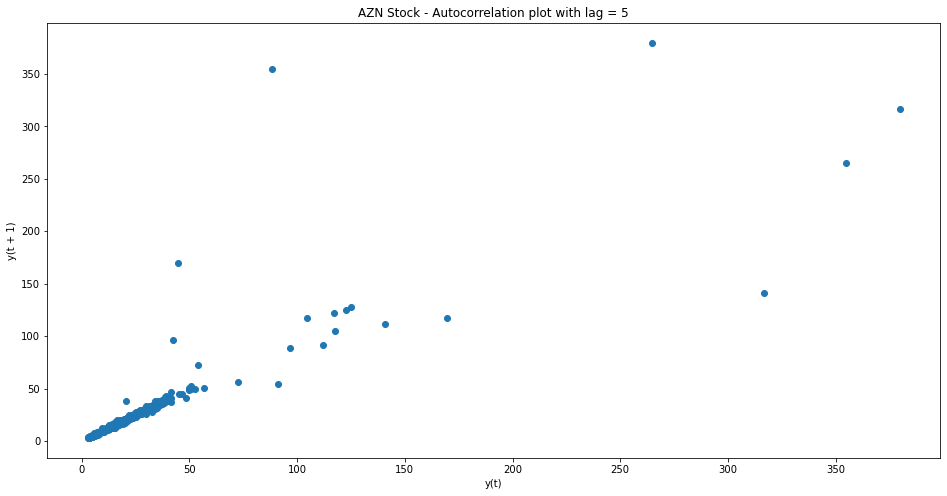

In [20]:
plt.figure(figsize=(16,8))
lag_plot(azn_df['open'], lag=1)
plt.title('AZN Stock - Autocorrelation plot with lag = 5')
plt.show()

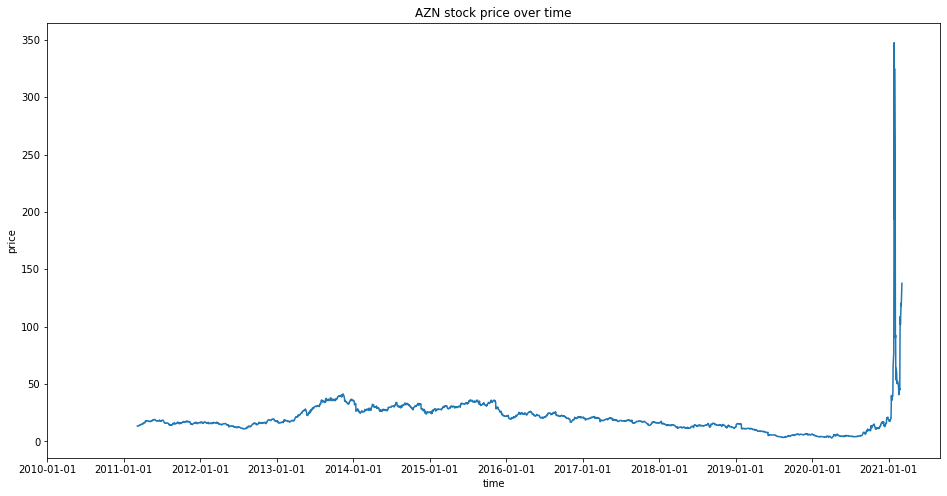

In [21]:
plt.figure(figsize=(16,8))
plt.plot(azn_df["date"], azn_df["close"])
xticks = pd.date_range(datetime.datetime(2010,1,1), datetime.datetime(2021,1,1), freq='YS')
xticks=xticks.to_pydatetime()
plt.xticks(xticks)
plt.title("AZN stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(azn_df["close"])
print(result)

(-1.229668781631899, 0.6607045420558189, 25, 2491, {'1%': -3.4329778809556224, '5%': -2.86270098200392, '10%': -2.5673880359934063}, 15390.990584431422)


In [23]:
azn_df['First Difference'] = azn_df['close'] - azn_df['close'].shift(1)
azn_df['Seasonal First Difference']=azn_df['close']-azn_df['close'].shift(25)

result = adfuller(azn_df['Seasonal First Difference'].dropna())
result

/Users/penndata/anaconda3/envs/PythonDataAdv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/penndata/anaconda3/envs/PythonDataAdv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(-3.054568063306164,
 0.030103207264273384,
 27,
 2464,
 {'1%': -3.433006706811432,
  '5%': -2.862713711420099,
  '10%': -2.567394813318277},
 15302.925628892352)

In [24]:
azn_df.head(30)

,date,stock_name,open,high,low,close,volume,First Difference,Seasonal First Difference
0,2011-03-07,GME,13.546800,13.654528,13.257281,13.270746,3568600,NaN,NaN
1,2011-03-08,GME,13.264012,13.486201,13.102419,13.344808,2365100,0.074061,NaN
2,2011-03-09,GME,13.344805,13.391936,13.264009,13.304407,3784300,-0.040401,NaN
3,2011-03-10,GME,13.243812,13.317876,13.129351,13.183215,5013600,-0.121192,NaN
4,2011-03-11,GME,13.095688,13.405405,13.095688,13.311144,3307900,0.127929,NaN
5,2011-03-14,GME,13.230347,13.540065,13.189949,13.344808,4056100,0.033664,NaN
6,2011-03-15,GME,13.082224,13.930583,13.075491,13.822855,6552900,0.478047,NaN
7,2011-03-16,GME,13.768989,14.038309,13.681459,13.829586,5368100,0.006731,NaN
8,2011-03-17,GME,13.997909,14.348024,13.937312,14.125835,4478300,0.296249,NaN
9,2011-03-18,GME,14.247029,14.253762,13.876715,14.112369,5653400,-0.013467,NaN


<AxesSubplot:>

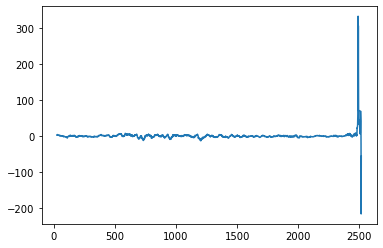

In [25]:
azn_df['Seasonal First Difference'].plot()

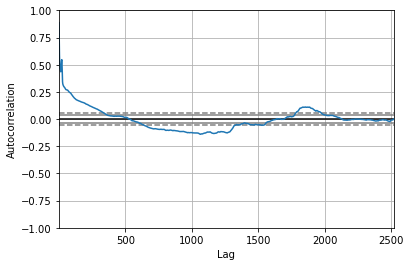

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(azn_df['close'])
plt.show()

In [27]:
X_train, X_test = azn_df[0:int(len(azn_df)*0.8)], azn_df[int(len(azn_df)*0.8):]
X_train = X_train.set_index('date')
X_test = X_test.set_index('date')
X_test

,stock_name,open,high,low,close,volume,First Difference,Seasonal First Difference
date,,,,,,,,
2019-03-07,GME,11.180657,11.277375,11.064594,11.209672,1811400,0.029016,0.377203
2019-03-08,GME,10.706736,10.851814,10.397237,10.610018,6171600,-0.599654,-0.357858
2019-03-11,GME,10.619689,10.909844,10.532643,10.890501,2703600,0.280483,0.019344
2019-03-12,GME,10.909844,11.170985,10.861485,11.093610,2164900,0.203109,0.096719
2019-03-13,GME,11.161312,11.258031,11.093610,11.200000,2191600,0.106390,-0.203109
...,...,...,...,...,...,...,...,...
2021-03-01,GME,104.540001,133.990005,99.970001,120.400002,49597300,18.660004,55.389999
2021-03-02,GME,116.930000,133.199997,112.199997,118.180000,33640400,-2.220001,41.389999
2021-03-03,GME,122.510002,127.750000,113.120003,124.180000,19173700,6.000000,-23.799995


<Figure size 864x576 with 0 Axes>

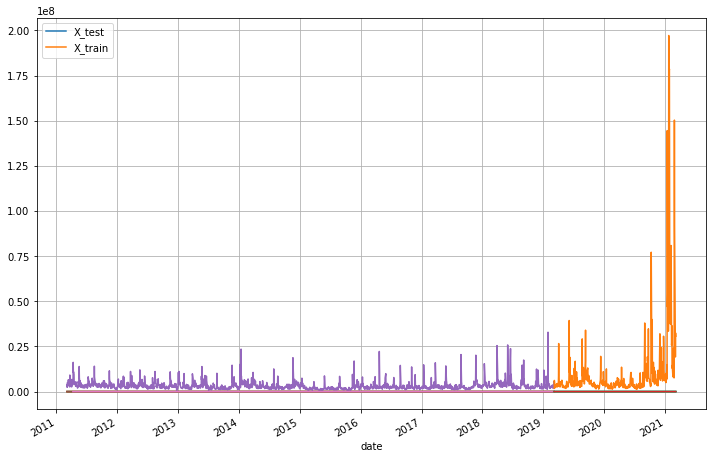

In [28]:
plt.figure(figsize=(12,8))
ax=X_train.plot(grid=True, figsize=(12,8))
X_test.plot(ax=ax,grid=True)
plt.legend(['X_test', 'X_train'])
plt.show()

In [29]:
#X_train, X_test = azn_df[0:int(len(azn_df)*0.8)], azn_df[int(len(azn_df)*0.8):]
training_data = X_train['close'].values
test_data = X_test['close'].values

In [ ]:
import warnings
warnings.filterwarnings('ignore')
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat[0])
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    print(yhat, true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

In [87]:
model = ARIMA(history, order=(1,1,1))
model_fit = model.fit(disp=0)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2516
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1835.098
Method:                       css-mle   S.D. of innovations              0.502
Date:                Sat, 06 Mar 2021   AIC                           3678.196
Time:                        16:18:01   BIC                           3701.517
Sample:                             1   HQIC                          3686.660
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0129      0.009      1.388      0.165      -0.005       0.031
ar.L1.D.y     -0.3323      0.117     -2.843      0.004      -0.561      -0.103
ma.L1.D.y      0.2335      0.120      1.952      0.051      -0.001       0.468
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.0091           +0.0000j            3.0091            0.5000
MA.1           -4.2832           +0.0000j            4.2832            0.5000
-----------------------------------------------------------------------------
"""

In [31]:
model_predictions

[39.680123377786614,
 39.37599849971993,
 39.410493749947236,
 39.83146323466576,
 39.54192958356742,
 40.08926812681937,
 39.885322284131064,
 40.176165342164275,
 40.17504467573182,
 40.49334348616284,
 40.61256735093635,
 40.566930278011995,
 40.22072402636164,
 40.17737882545302,
 40.5331341357549,
 40.29182745682161,
 40.59911311698766,
 38.21142770888244,
 38.986565673260756,
 39.165278647084484,
 38.94682673863811,
 38.27618055913647,
 38.40803941936636,
 38.57802788783317,
 38.452788366831925,
 38.28900732749817,
 37.63257559147712,
 37.33699997376923,
 37.5716372362727,
 37.13650341929646,
 36.6520430149867,
 36.61772816755931,
 36.59214617814182,
 36.55643710725943,
 36.56128080462828,
 36.8752335690622,
 35.90428189683869,
 36.07113502547013,
 35.52877549663808,
 35.32565326596783,
 35.495709605266896,
 36.25292489933854,
 36.22745327769494,
 35.89400829985203,
 36.13479710301978,
 36.308673674418756,
 35.598066539354114,
 35.22049400061186,
 35.66989097745032,
 35.590675535

In [32]:
test_date_range = X_test.index #azn_df[int(len(azn_df)*0.8):].index
test_date_range

DatetimeIndex(['2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20',
               ...
               '2021-02-22', '2021-02-23', '2021-02-24', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-03',
               '2021-03-04', '2021-03-05'],
              dtype='datetime64[ns]', name='date', length=504, freq=None)

In [40]:
test_data = X_test['close'].values
test_data = test_data.tolist()
test_data

[39.32904052734375,
 39.43288803100586,
 39.82938766479492,
 39.5084114074707,
 40.0748405456543,
 39.90491485595703,
 40.1314811706543,
 40.19757080078125,
 40.471336364746094,
 40.61294937133789,
 40.54686737060547,
 40.207008361816406,
 40.169246673583984,
 40.537418365478516,
 40.26365280151367,
 40.5751838684082,
 38.16786193847656,
 38.96086502075195,
 39.26295852661133,
 38.79093551635742,
 38.26226806640625,
 38.42275619506836,
 38.57380676269531,
 38.41331100463867,
 38.271705627441406,
 37.610870361328125,
 37.308780670166016,
 37.58255386352539,
 37.10108947753906,
 36.60074234008789,
 36.62906265258789,
 36.58185958862305,
 36.52521896362305,
 36.55354309082031,
 36.874515533447266,
 35.86438751220703,
 36.04375457763672,
 35.55284881591797,
 35.260189056396484,
 35.51509094238281,
 36.260887145996094,
 36.20423889160156,
 35.854942321777344,
 36.157039642333984,
 36.31753158569336,
 35.54341125488281,
 35.19410705566406,
 35.703895568847656,
 35.57173156738281,
 35.6850166

In [47]:
#plt.figure(figsize=(18,10))
#plt.plot(test_date_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
#plt.plot(test_date_range, test_data, color='red', label='Actual Price')
#plt.xticks(xticks)
#plt.title('AZN Prices Prediction')
#plt.xlabel('Date')
#plt.ylabel('Prices')
#plt.xticks(np.arange(0,504,50), test_date_range[0:504:50])
#plt.legend()
#plt.show()
plot_df =  pd.DataFrame({'date': test_date_range,
                        'prediction': model_predictions,
                        'Actual': test_data})
import plotly.express as go
fig = go.line(plot_df,x='date',y=['prediction','Actual'])
fig.show()